# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
# Cargar los Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar archivos y ,ostrar las primeras columnas
df_flights = pd.read_csv('flights.csv')
df_flights.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    R - Identify any null or missing data, and impute appropriate replacement values.
    R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    R - View summary statistics for the numeric fields in the dataset.
    R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        R - *What are the average (mean) departure and arrival delays?*
        R - *How do the carriers compare in terms of arrival delay performance?*
        R - *Is there a noticable difference in arrival delays for different days of the week?*
        R - *Which departure airport has the highest average departure delay?*
        * - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        * - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        R - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.


# Cleanning the data

####     R - Identify any null or missing data, and impute appropriate replacement values.
####     R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.

In [13]:
# Identificar datos nulos
null_data = df_flights.isnull().sum()
print("Datos nulos por columna:")
print(null_data)

# Reemplazar valores nulos en columnas numéricas con la media
df_flights_clean = df_flights.fillna(df_flights.mean(numeric_only=True))

# Reemplazar valores nulos en columnas categóricas con 'Unknown'
categorical_cols = df_flights_clean.select_dtypes(include=['object']).columns
df_flights_clean[categorical_cols] = df_flights_clean[categorical_cols].fillna('Unknown')

Datos nulos por columna:
Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


In [14]:
# Verificar que los valores nulos han sido reemplazados
null_data_clean = df_flights_clean.isnull().sum()
print("\nDatos nulos después de la limpieza:\n", null_data_clean)


Datos nulos después de la limpieza:
 Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64


In [11]:
#Función para eliminar outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar outliers en DepDelay y ArrDelay
df_flights_clean = remove_outliers(df_flights_clean, 'DepDelay')
df_flights_clean = remove_outliers(df_flights_clean, 'ArrDelay')

# Mostrar datos acrualizados
print("\nDatos después de eliminar outliers:\n", df_flights_clean.head())


Datos después de eliminar outliers:
    Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0  2013      9          16          1      DL            15304   
1  2013      9          23          1      WN            14122   
2  2013      9           7          6      AS            14747   
4  2013      5          16          4      DL            13931   
6  2013     10           6          7      WN            13796   

                    OriginAirportName  OriginCity OriginState  DestAirportID  \
0                 Tampa International       Tampa          FL          12478   
1            Pittsburgh International  Pittsburgh          PA          13232   
2        Seattle/Tacoma International     Seattle          WA          11278   
4               Norfolk International     Norfolk          VA          10397   
6  Metropolitan Oakland International     Oakland          CA          12191   

                            DestAirportName    DestCity DestState  CRSDepTime  \
0  

# Explore the cleaned data.

#### R - View summary statistics for the numeric fields in the dataset.

In [15]:
# Estadísticas descriptivas
print("Resumen estadístico:")
print(df_flights_clean.describe())



Resumen estadístico:
           Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  271940.0  271940.000000  271940.000000  271940.000000    271940.000000   
mean     2013.0       6.978514      15.814775       3.899316     12744.899584   
std         0.0       1.982431       8.799033       1.987219      1501.199773   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      23.000000       6.000000     14057.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay       DepDel15  \
count  271940.000000  271940.000000  271940.000000  271940.000000   
mean    12739.136493    1325.498713      10.350449       0.201134   
std      1502.569949     470.748546      3

#### R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.

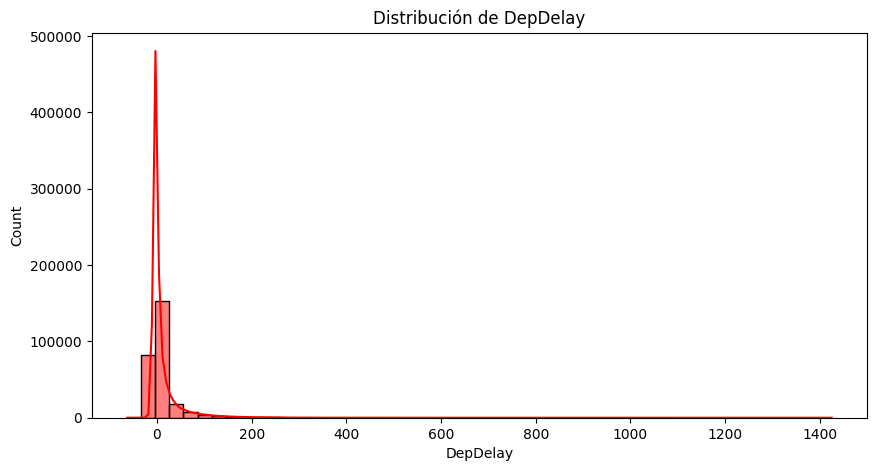

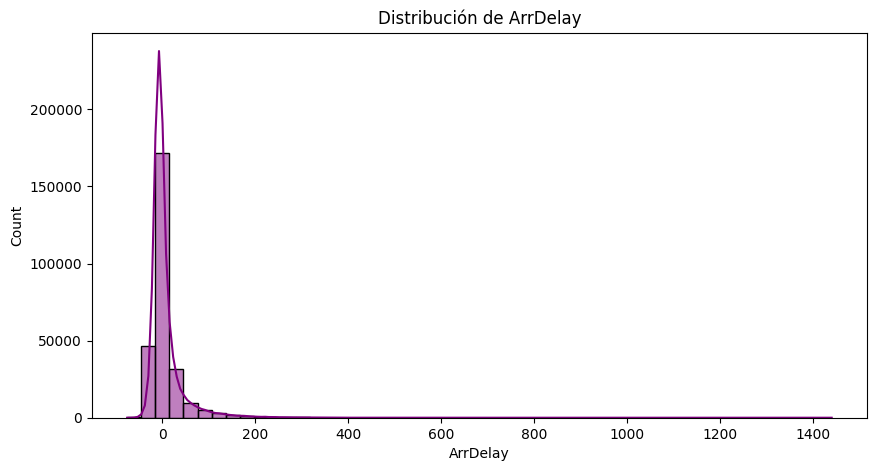

In [19]:

# Distribución de DepDelay
plt.figure(figsize=(10, 5))
sns.histplot(df_flights['DepDelay'], bins=50, kde=True, color='red')
plt.title('Distribución de DepDelay')
plt.show()

# Distribución de ArrDelay
plt.figure(figsize=(10, 5))
sns.histplot(df_flights['ArrDelay'], bins=50, kde=True, color='purple')
plt.title('Distribución de ArrDelay')
plt.show()


## Answering the questions

#### R - *What are the average (mean) departure and arrival delays?*

In [85]:
# Calcular retrasos promedio
mean_dep_delay = df_flights_clean['DepDelay'].mean()
mean_arr_delay = df_flights_clean['ArrDelay'].mean()

print(f"Retraso promedio en salida: {mean_dep_delay:.2f} minutos")
print(f"Retraso promedio en llegada: {mean_arr_delay:.2f} minutos")



Retraso promedio en salida: 0.22 minutos
Retraso promedio en llegada: -4.51 minutos


#### R - *How do the carriers compare in terms of arrival delay performance?*

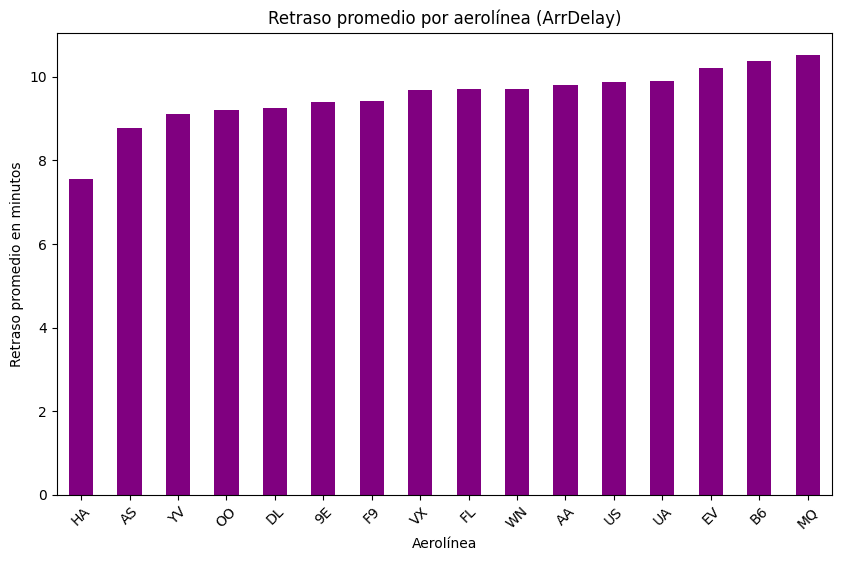

In [86]:
# Filtrar solo retrasos positivos
df_flights_positive = df_flights_clean[df_flights_clean['ArrDelay'] > 0]

# Comparar retraso promedio por aerolínea 
carrier_delay = df_flights_positive.groupby('Carrier')['ArrDelay'].mean().sort_values()

# Visualización del retraso por aerolínea 
plt.figure(figsize=(10, 6))
carrier_delay.plot(kind='bar', color='purple')
plt.title('Retraso promedio por aerolínea (ArrDelay)')
plt.ylabel('Retraso promedio en minutos')
plt.xlabel('Aerolínea')
plt.xticks(rotation=45)
plt.show()


#### R - *Is there a noticable difference in arrival delays for different days of the week?*

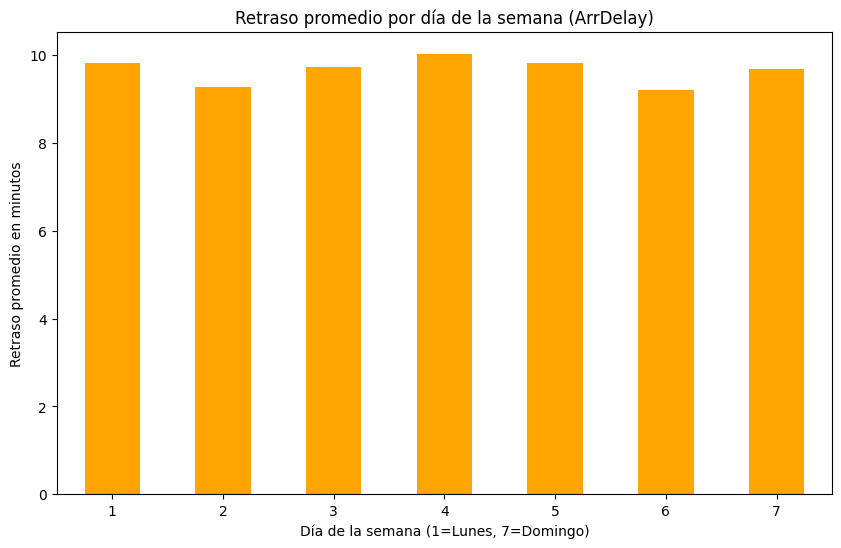

In [87]:
# Comparar retraso promedio por día de la semana 
day_of_week_delay = df_flights_positive.groupby('DayOfWeek')['ArrDelay'].mean()

# Visualización del retraso por día de la semana 
plt.figure(figsize=(10, 6))
day_of_week_delay.plot(kind='bar', color='orange')
plt.title('Retraso promedio por día de la semana (ArrDelay)')
plt.xlabel('Día de la semana (1=Lunes, 7=Domingo)')
plt.ylabel('Retraso promedio en minutos')
plt.xticks(rotation=0)
plt.show()


####         R - *Which departure airport has the highest average departure delay?*

In [88]:
# Identificar el aeropuerto con mayor retraso en salida
max_dep_delay_airport = df_flights_clean.groupby('OriginAirportName')['DepDelay'].mean().idxmax()
max_dep_delay_value = df_flights_clean.groupby('OriginAirportName')['DepDelay'].mean().max()

print(f"Aeropuerto con mayor retraso promedio en salida: {max_dep_delay_airport} ({max_dep_delay_value:.2f} minutos)")



Aeropuerto con mayor retraso promedio en salida: Chicago Midway International (4.77 minutos)


#### * - *Do **late** departures tend to result in longer arrival delays than on-time departures?*

In [89]:
# Comparar retrasos de llegada entre vuelos con salida a tiempo y retrasados
late_departures = df_flights_clean[df_flights_clean['DepDelay'] > 0]
on_time_departures = df_flights_clean[df_flights_clean['DepDelay'] <= 0]

avg_late_arrival_delay = late_departures['ArrDelay'].mean()
avg_on_time_arrival_delay = on_time_departures['ArrDelay'].mean()

print(f"Retraso promedio de llegada con salidas tardías: {avg_late_arrival_delay:.2f} minutos")
print(f"Retraso promedio de llegada con salidas a tiempo: {avg_on_time_arrival_delay:.2f} minutos")



Retraso promedio de llegada con salidas tardías: 3.30 minutos
Retraso promedio de llegada con salidas a tiempo: -8.14 minutos


#### * - *Which route (from origin airport to destination airport) has the most **late** arrivals?*

In [90]:
# Identificar la ruta con más llegadas tarde
df_flights_clean['Route'] = df_flights_clean['OriginCity'] + " -> " + df_flights_clean['DestCity']
late_arrivals = df_flights_clean[df_flights_clean['ArrDelay'] > 0]

most_late_route = late_arrivals['Route'].value_counts().idxmax()
late_route_count = late_arrivals['Route'].value_counts().max()

print(f"La ruta con más llegadas tarde es: {most_late_route} con {late_route_count} llegadas tarde")



La ruta con más llegadas tarde es: San Francisco -> Los Angeles con 269 llegadas tarde


#### R - *Which route has the highest average arrival delay?*

In [91]:
# Ruta con mayor retraso promedio de llegada
max_avg_delay_route = df_flights_clean.groupby('Route')['ArrDelay'].mean().idxmax()
max_avg_delay_value = df_flights_clean.groupby('Route')['ArrDelay'].mean().max()

print(f"La ruta con mayor retraso promedio de llegada es: {max_avg_delay_route} con un retraso promedio de {max_avg_delay_value:.2f} minutos")


La ruta con mayor retraso promedio de llegada es: Cleveland -> West Palm Beach/Palm Beach con un retraso promedio de 18.00 minutos
